# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 10. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash; 40 баллов
* Задача 3 &mdash; 10 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [45]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from IPython.display import clear_output

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

In [2]:
def show_progress(x, y, y_pred, loss):
    '''
    Визуализация процесса обучения.
    x, y -- объекты и таргеты обучающей выборки;
    y_pred -- предсказания модели;
    loss -- текущее значение ошибки модели.
    '''

    # Избавимся от градиентов перед отрисовкой графика
    y_pred = y_pred.detach()

    # Превратим тензор размерности 0 в число, для краисивого отображения
    loss = loss.item()

    # Стираем предыдущий вывод в тот момент, когда появится следующий
    clear_output(wait=True)

    # Строим новый график
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, alpha=0.75)
    plt.scatter(x, y_pred, color='orange', linewidth=5)
    plt.xlabel('Признак')
    plt.ylabel('Таргет')
    plt.show()

    print(f"MSE = {loss:.3f}")

In [17]:
def show_progress_np(x, y, y_pred, loss):
    # Стираем предыдущий вывод в тот момент, когда появится следующий
    clear_output(wait=True)

    # Строим новый график
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, alpha=0.75)
    plt.scatter(x, y_pred, color='orange', linewidth=3)
    plt.xlabel('Признак')
    plt.ylabel('Таргет')
    plt.show()

    print(f"MSE = {loss:.3f}")

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> с занятия по нейронным сетям.

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = w_{21}u_1(x) + w_{22}u_2(x) + b_2,$$

$$u_1(x) = \sigma\big(w_{11}x + b_{11}\big),$$

$$u_2(x) = \sigma\big(w_{12}x + b_{12}\big).$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

...

**2.** Дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке минимизируя MSE
$$\text{MSE} = \sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; выписать производные по всем параметрам сети для использования градиентного спуска. Конечно, в данном случае довольно просто выписать все производные напрямую. Мы будем выписывать их поэтапно, так вам будет проще понять общую процедуру в дальнейшем.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = ...$$

Теперь мы можем взять производные выходов сети по весам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{21}} = ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{22}} = ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = ...$$

Наконец, выпишем производные MSE по весам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа.

$$\frac{\partial\:\text{MSE}}{\partial w_{21}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{...} \frac{\partial ...}{\partial w_{21}} = ... $$

$$\frac{\partial\:\text{MSE}}{\partial w_{22}} = \sum_{i=1}^n \frac{\partial \:\text{MSE}}{...} \frac{\partial ...}{\partial w_{22}} = ... $$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{...} \frac{\partial ...}{\partial b_2} = ... $$

**2.2.** Теперь будем разбираться с производным по параметрам первого слоя. Начнем с производной выхода сети по выходу певрого слоя.

$$\frac{\partial \widehat{y}(X_i)}{\partial u_1(X_i)} = ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial u_2(X_i)} = ...$$

Далее нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = ...$$

Теперь мы можем взять производные выходов первого слоя по его параметрам

$$\frac{\partial u_1(X_i)}{\partial w_{11}} = ...$$

$$\frac{\partial u_1(X_i)}{\partial b_{11}} = ...$$

$$\frac{\partial u_2(X_i)}{\partial w_{12}} = ...$$

$$\frac{\partial u_2(X_i)}{\partial b_{12}} = ...$$

Наконец, выпишем производные MSE по весам первого слоя. Аналогично, запишите правило производной сложной функции и выпишите итоговый ответ.

$$\frac{\partial\:\text{MSE}}{\partial w_{11}} = ...$$

$$\frac{\partial\:\text{MSE}}{\partial b_{11}} = ...$$

$$\frac{\partial\:\text{MSE}}{\partial w_{12}} = ...$$

$$\frac{\partial\:\text{MSE}}{\partial b_{12}} = ...$$

Вы могли заметить, мы считали производные начиная с последнего слоя и постепенно доходили до первого. Подобная процедура называется *методом обратного распространения ошибки* (backpropagation), ее преимуществом является эффективное вычисление градиентов.

**3.** Выпишите формулу градиентного спуска по одному из параметров.

## Ответ на пункты выше:

![11.jpg](attachment:11.jpg)

![12.jpg](attachment:12.jpg)

Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

~~*Разделяем выборку на батчи, т.е. на N / k подмассивов, где k - размер выборки поменьше. Для такой техники будем для каждого батча считать градиент, потом усреднять градиент по всем батчам и использовать уже усредненный для обновления параметра в 3 пункте.~~

---
### Задача 2.

Реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. шаблон класса задачи 4 из <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/task6.html#Задача-4." target="_blank">задания 6</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [3]:
cool_weights = [[-0.7173, -0.7389, 0.7966, -1.1601],
                [-4.0368, -3.2180, 3.5530, 0],]

In [98]:
def mse_grad(y_pred, y):
    return 2 * (y - y_pred)

def mse(y_pred, y):
    return np.mean((y - y_pred) ** 2)

def act_fn(X):
    return 1 / (1 + np.exp(-X))

class Net2L:
    def __init__(self):
        self.w_ = np.random.rand(2, 4)
        # self.w_ = np.array(cool_weights, dtype=np.float32)
        # self.w_ = np.zeros(shape=(2,4), dtype=np.float64)
        
        '''
            self.w_ = w11 w21
                      w12 w22
                      b11 b2
                      b12 sentinel
        '''
        
        self.act_fn = act_fn
        self.grad_ = np.zeros(shape=(2,4), dtype=np.float64)
        
        '''
            self.grad_ = grad_w11 grad_w21
                         grad_w12 grad_w22
                         grad_b11 grad_b2
                         grad_b12 sentinel
        '''
        
        self.fitted = False
        
    def zero_grad(self):
        self.grad = np.zeros((2, 4))
        
    def forward(self, X):
        u1 = self.act_fn(self.w_[0][0] * X + self.w_[0][2])
        u2 = self.act_fn(self.w_[0][1] * X + self.w_[0][3])
        forward_out = self.w_[1][0] * u1 + self.w_[1][1] * u2 + self.w_[1][2]
        return u1, u2, forward_out
        
    def backward(self, X, Y, loss_fn_grad):
        u1, u2, forward_out = self.forward(X)
        
        loss_grad = loss_fn_grad(forward_out, Y)
        
        # print(np.sum(loss_grad * u1))
        # sys.exit()
        
        self.grad_[1][0] += np.sum(loss_grad * u1)
        self.grad_[1][1] += np.sum(loss_grad * u2)
        self.grad_[1][2] += np.sum(loss_grad)
        
        tmp = 2 * self.w_[1][0] * forward_out * u1 * (1 - u1)
        self.grad_[0][0] += np.sum(tmp * X)
        self.grad_[0][2] += np.sum(tmp)
        
        tmp = 2 * self.w_[1][1] * forward_out * u2 * (1 - u2)
        self.grad_[0][1] += np.sum(tmp * X)
        self.grad_[0][3] += np.sum(tmp)
        
        
    def fit(self, X, Y, loss_fn_grad=mse_grad, epochs=100, learning_rate=0.001):
        '''
        X.shape = (samples_size, batch_size, 1)
        '''
        batch_size = X.shape[0]
        
        for e in tqdm(range(epochs)):
            for (X_b, Y_b) in zip(X, Y):
                X = X.astype(np.float128)
                
                self.backward(X_b, Y_b, loss_fn_grad)
                # self.w_ -= learning_rate * self.grad_ / (X.shape[1])
                # self.zero_grad()

            # print(self.grad_)
            self.w_ -= learning_rate * self.grad_ / (X.shape[0] * X.shape[1])
            self.zero_grad()

        self.fitted = True
    
    def predict(self, X):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        # assert(self.fitted == True)
        return self.forward(X)[-1]

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [99]:
# sample_size = int(100000)
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
# y = np.exp(X)
# y = np.sin(X)
y = X

X, y = shuffle((X, y))
X, X_test, y, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# batch_size  = X.shape[0]
batch_size = 1000
# batch_size = 1

X = X.reshape(X.shape[0] // batch_size, batch_size, 1)
y = y.reshape(y.shape[0] // batch_size, batch_size, 1)

Обучите нейронную сеть на этих данных, а также простую линейную регрессию.

In [103]:
np.set_printoptions(suppress=True)

model = Net2L()
model.fit(X, y, epochs=50, learning_rate=0.005)

/tmp/ipykernel_121212/1483835435.py:71: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for e in tqdm(range(epochs)):


  0%|          | 0/50 [00:00<?, ?it/s]

In [104]:
model.w_

array([[ -2.28936856,  -0.21549274, -13.52521652, -11.96029701],
       [ 13.29388861,  10.88240273,  69.14212014,   0.44972113]])

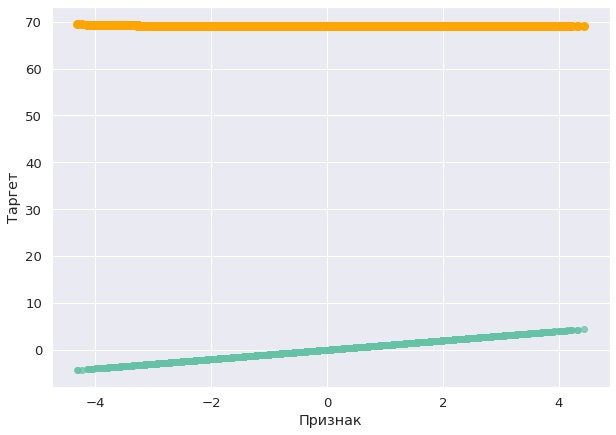

MSE = 4781.402


In [105]:
pred = model.predict(X_test.reshape(-1, 1, 1)).reshape(-1, 1)
loss = mse(pred, y_test)
# fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 10))
show_progress_np(X_test, y_test, pred, loss)

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

<AxesSubplot:>

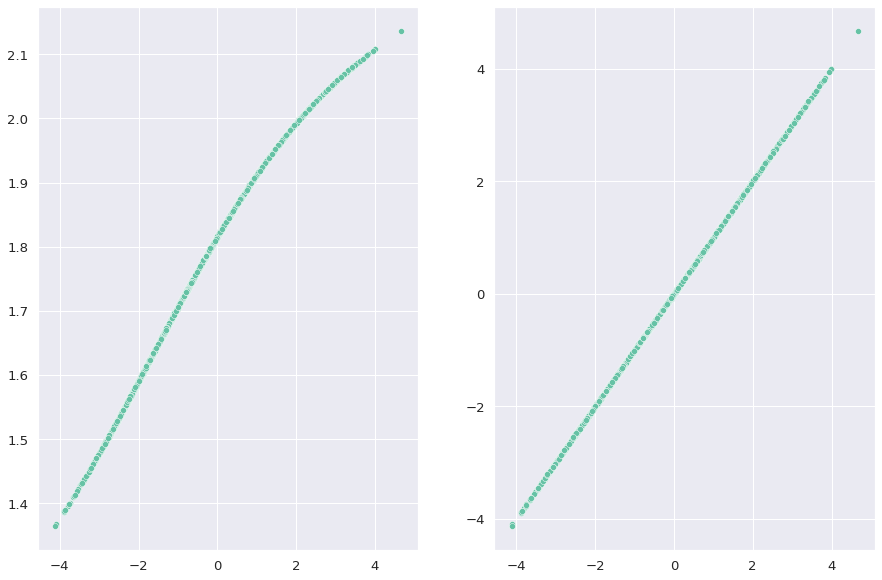

In [ ]:
size = X[0].shape[0]
pred = model.predict(X[0].reshape(1, size, 1))

data = X[0].reshape(size)
pred = pred.reshape(size)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 10))

sns.scatterplot(x = data, y=pred, ax=ax1)
sns.scatterplot(x = data, y=y[0].reshape(size))

Повторите вычисления для другой нелинейной функции $y(x)$.

**Вывод:**
...

---
### Задача 3.

Теперь напишите рассмотренную ранее нейронную сеть с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

Обучите нейросеть на рассмотренных ранее данных. Используйте код с занятия.

In [11]:
import torch
from torch import nn
import torch.nn.functional as F

In [34]:
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=2, bias=True),
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1, bias=True)
)

model

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

In [36]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)
optim_func = nn.MSELoss()

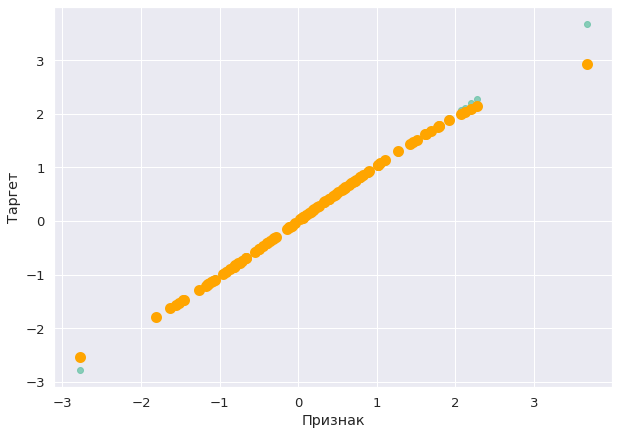

MSE = 0.007
Готово!


In [37]:
# Количество итераций
epochs = 10010

XT = torch.from_numpy(X.astype(np.float32))
yT = torch.from_numpy(y.astype(np.float32))

stop = False

for i in range(epochs):
    if stop:
        break

    for (X_b, Y_b) in zip(XT, yT):

      # Forward pass: предсказание модели
      y_pred =  model(X_b)
      # Подсчет оптимизируемой функции (MSE)
      loss = optim_func(y_pred, Y_b)
      # Bakcward pass: подсчет градиентов
      loss.backward()
      # Оптимизация: обновление параметров
      optimizer.step()
      optimizer.zero_grad()

    # График + вывод MSE через каждые 5 итераций
    if (i + 1) % 5 == 0:
        show_progress(X_b, Y_b, y_pred, loss)
        if loss.item() < 35:
            print("Готово!")
            stop = True
            break